In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import KMeans, DBSCAN
from sklearn.datasets import make_blobs, make_moons, load_digits
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples

def silhouette_analysis(n_clusters, X):
    clusterer = KMeans(n_clusters=n_clusters)
    fig, ax = plt.subplots()
    ax.set_xlim([-1, 1])
    ax.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    ax.set_ylabel('Sample')
    ax.set_title('Silhouette analysis')
    cluster_labels = clusterer.fit_predict(X)
    ax.set_xlabel('Silhouette score: {}'.format(
        round(silhouette_score(X, cluster_labels), 2)))
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i+1))
        y_lower = y_upper + 10

In questa lezione, vedremo come usare un metodo di clustering per suddividere un insieme di dati senza conoscenza pregressa alcuna (se non, ovviamente, quella riguardante i dati stessi).

## Generazione dei dati

Anche questa volta, useremo una delle funzioni offerte da Scikit Learn per la generazione di dati, ovvero `make_blobs`. Generiamo 1000 campioni, appartenenti a 5 cluster differenti.

In [41]:
X, y = make_blobs(n_samples=1000, centers=5, random_state=42)

Proviamo adesso a creare i cluster per i dati utilizzando l'algoritmo [K-Means](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). Tra i diversi iperparametri richiesti dalla relativa classe di Scikit Learn, quello fondamentale è `n_clusters`, che permette di determinare il numero di cluster in cui l'algoritmo andrà a suddividere i dati.

Prima di procedere, però, definiamo una funzione di comodo, chiamata `predict_and_show`, che accetta come parametri un algoritmo di clustering e l'insieme dei dati, e mostra a schermo lo scatter plot delle prime due feature colorate secondo il valore predetto dall'algoritmo passato come parametro.

In [42]:
def predict_and_show(clustering_alg, X):
    fig, ax = plt.subplots()
    y_pred = clustering_alg.fit_predict(X)
    ax.scatter(X[:, 0], X[:, 1], c=y_pred)
    plt.show()    

Facciamo adesso una prova impostando a 2 il valore di `n_clusters`.

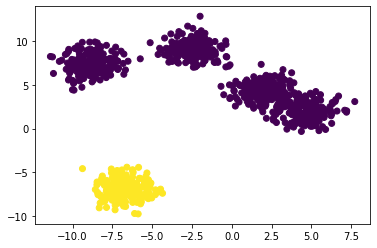

In [43]:
predict_and_show(KMeans(n_clusters=2), X)

Da una rapida analisi visiva, è evidente come i risultati non siano ottimali. In tal senso, infatti, sappiamo che il numero di cluster imposto non è quello corretto. Proviamo quindi ad usare il valore ottimale (ovvero 5).

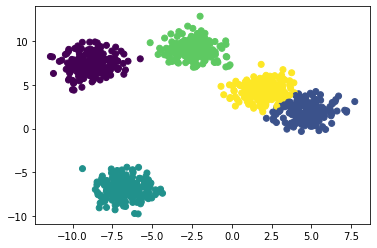

In [44]:
predict_and_show(KMeans(n_clusters=5), X)

I risultati sono molto più soddisfacenti. Per avere un'ulteriore controprova, usiamo la tecnica della *silhouette analysis*. Per farlo, usiamo la funzione `silhouette_analysis`, riadattata dall'esempio raggiungibile a [questo indirizzo](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html).

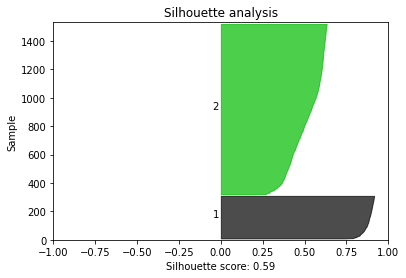

In [7]:
silhouette_analysis(2, X)

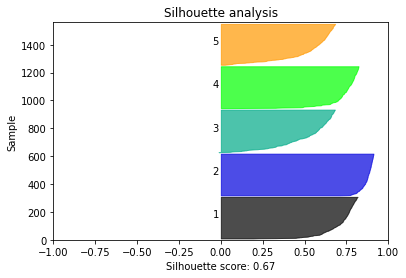

In [8]:
silhouette_analysis(5, X)

L'analisi mostra come il silhouette score sia, come prevedibile, migliore specificando il numero di cluster esatto. 

Tuttavia, è importante sottolineare come la differenza *non sia molto rilevante*: si potrebbe quindi essere tentati di usare un numero basso di cluster, ottenendo risultati evidentemente subottimali.

## Esercizio 1: prerequisiti del K-Means

Nonostante sia spesso utilizzato, l'algoritmo K-Means ha dei limiti evidenti di cui bisogna tener conto nel suo utilizzo nei casi reali. In particolare, il [K-Means assume che i dati sotto analisi seguano una distribuzione normale](https://stats.stackexchange.com/a/424632/246448); inoltre, i cluster devono essere isotropi (ovvero identicamente distribuiti in tutte le dimensioni dell'iperspazio), e devono avere varianza simile.

Queste limitazioni pongono limiti notevoli all'applicabilità del K-Means. Per comprendere quello di cui stiamo parlando, proviamo a vedere cosa succede dando al K-Means dati un po' più complesssi. Usiamo, in tal senso, il metodo [`make_moons`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons) di Scikit Learn.

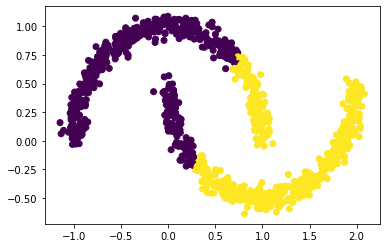

In [45]:
X, y = make_moons(n_samples=1000, noise=0.05)
predict_and_show(KMeans(n_clusters=2), X)

Notiamo come, nonostante si sia passato il numero di cluster esatto, il K-Means non riesca ad essere preciso nell'assegnazione dei cluster.

Vediamo cosa accade dunque usando il [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html). Anche in questo caso, dovremo impostare due valori:

* `eps`, che rappresenta la massima distanza entro la quale due campioni possono essere considerati come *neighboors* (vicini);
* `min_sample`, che rappresenta il numero minimo di vicini affinché un punto sia considerato come *core point*.

Il DBSCAN si basa su una nozione differente rispetto al K-Means. Infatti, laddove il K-Means raggruppa i punti in cluster sulla base della loro distanza nell'iperspazio delle feature, il DBSCAN "agglomera" punti basandosi sul concetto di *densità*. In pratica, un agglomerato (ovvero, un cluster) viene definito aggregando (almeno) un numero minimo di campioni (`min_samples`) se questi sono entro una distanza massima (`eps`).


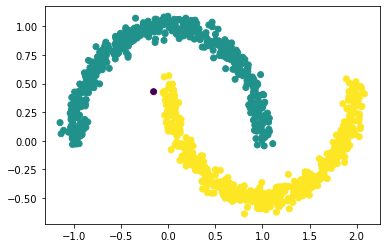

In [46]:
predict_and_show(DBSCAN(eps=.1), X)

## Esercizio 2

Vediamo rapidamente come la PCA può essere usata per migliorare le performance del K-Means nel caso di uno spazio ad elevata dimensionalità. Usiamo stavolta il metodo [`load_digits`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html), che carica un dataset rappresentativo delle dieci cifre decimali.

In [47]:
X, y = load_digits(return_X_y=True)
X.shape

(1797, 64)

Notiamo che ci sono ben 64 feature, per cui ci attendiamo che i risultati raggiunti dal K-Means siano abbastanza scarsi.

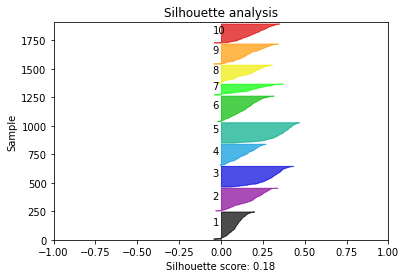

In [48]:
silhouette_analysis(10, X)

Come prevedibile, il silhouette score è molto basso. Vediamo cosa succede applicando la PCA ai dati, e passando le prime tre componenti principali all'algoritmo K-Means.

Varianza spiegata dalle prime tre componenti principali: ~40%


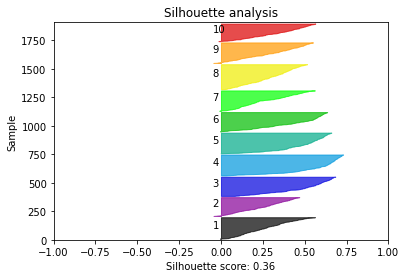

In [57]:
pca = PCA(n_components=3)
X_ca = pca.fit_transform(X)
print('Varianza spiegata dalle prime tre componenti principali: ~{}%'.format(round(sum(pca.explained_variance_ratio_) * 100)))
silhouette_analysis(10, X_ca)

Notiamo come il silhouette score sia *raddoppiato*. Ovviamente, i risultati sono lungi dall'essere ottimali, in quanto la varianza spiegata dalle prime tre componenti è comunque molto bassa.